<a href="https://colab.research.google.com/github/kunalsir98/Deep_learning/blob/main/ANN_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Feb  2 06:38:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
ROOT="/content/drive/MyDrive/REGRESSION-using-ANN"

In [ ]:
os.chdir(ROOT)

In [ ]:
!pwd

/content/drive/MyDrive/REGRESSION-using-ANN


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y=pd.DataFrame(housing.target,columns=['target'])

In [ ]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640, 1)

In [ ]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y, random_state=42)

In [ ]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=42)

In [ ]:
X_train_full.shape

(15480, 8)

In [ ]:
X_valid.shape

(3870, 8)

In [ ]:
print(X_train_full.shape)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(15480, 8)
(11610, 8)
(5160, 8)
(3870, 8)


In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
LAYERS = [
    tf.keras.layers.Dense(30, activation='relu', input_shape= X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)

]

In [ ]:
model=tf.keras.models.Sequential(LAYERS)

In [ ]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
EPOCHS = 10

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))


Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3730 - coeff_determination: 0.7002 - val_loss: 0.3474 - val_coeff_determination: 0.7158
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3652 - coeff_determination: 0.7066 - val_loss: 0.3511 - val_coeff_determination: 0.7083
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3579 - coeff_determination: 0.7148 - val_loss: 0.3293 - val_coeff_determination: 0.7292
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3510 - coeff_determination: 0.7175 - val_loss: 0.3399 - val_coeff_determination: 0.7186
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3454 - coeff_determination: 0.7264 - val_loss: 0.6571 - val_coeff_determination: 0.3925
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3524 - coeff_determination: 0.7181 - val_loss: 0.3292 - val_coeff_determination: 0.7293
Epoch 7/10
363/3

In [ ]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.373024,0.700161,0.347434,0.715814
1,0.365249,0.706649,0.351109,0.708252
2,0.357854,0.714846,0.329295,0.729248
3,0.351016,0.717456,0.339891,0.718628
4,0.345421,0.726438,0.657115,0.392515
5,0.352443,0.718095,0.329228,0.729259
6,0.343210,0.726519,0.316804,0.737274
7,0.341923,0.728841,0.320307,0.736132
8,0.333868,0.736518,0.341375,0.711425
9,0.332579,0.736154,0.347077,0.706000


<Axes: >

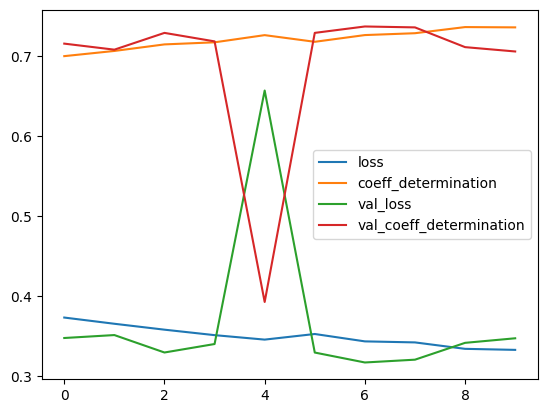

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3478 - coeff_determination: 0.7088


[0.34777864813804626, 0.7087766528129578]

In [ ]:
new = X_test[0]

In [ ]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [ ]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [ ]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 167ms/step


array([[0.81670976]], dtype=float32)